PREDICTING CALIFONIA MEDIAN HOUSING VALUE USING MACHINE LEARNING ALGORITHM

In [2]:
#importing the module needed 

import pandas as pd #for reading and preprocessing
import numpy as np  #for some calculation
import matplotlib.pyplot as plt #visualization
from sklearn.model_selection import StratifiedShuffleSplit #for spliting the dataset into train and test set
from sklearn.impute import SimpleImputer #for imputations

DATA PROFILING SECTION

In [3]:
df=pd.read_csv("housing.csv")

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df.info()

'''THIS SHOWS THAT THERE IS ONLY ONE CATEGORICAL COLUMN IN THE DATASET 
AND ALSO INDICATE THAT TOTAL_BEDROOMS COLUMNS AS SOME MISSING VALUES'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


'THIS SHOWS THAT THERE IS ONLY ONE CATEGORICAL COLUMN IN THE DATASET \nAND ALSO INDICATE THAT TOTAL_BEDROOMS COLUMNS AS SOME MISSING VALUES'

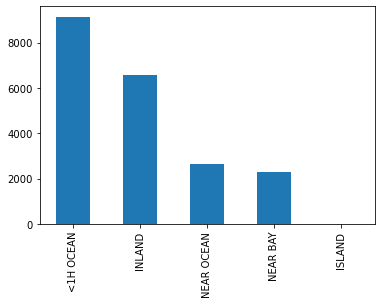

In [6]:
#VISUALIZING THE CATEGORICAL COLUMN USING BAR CHART


df["ocean_proximity"].value_counts().plot(kind="bar")
plt.show()


In [7]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


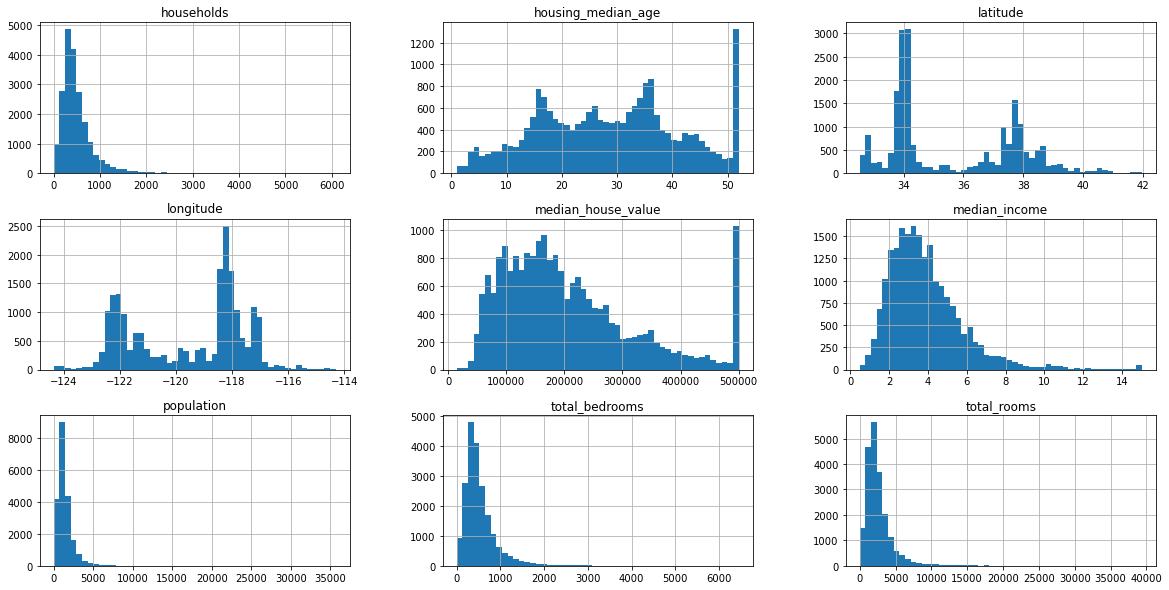

In [8]:
# CHECKING THE DISTRIBUTION OF THE NUMERIC COLUMNS

df.hist(bins=50,figsize=(20,10))
plt.show()

In [9]:
def split_train_test(data,test_ratio):
    shuffled_indices=np.random.permutation(len(data))
    test_set_size=int(len(data)*test_ratio)
    test_indces=shuffled_indices[:test_set_size]
    train_indces=shuffled_indices[test_set_size:]
    return data.iloc[ train_indces],data.iloc[test_indces]

In [10]:
train_set,test_set=split_train_test(df,0.2)
print(len(train_set))
print(len(test_set))

16512
4128


CREATION OF THE TRAIN AND TESTSET SECTION

In [11]:
'''ASSUMING THE MEDIAN_INCOME COLUMN HAS A GREAT IMPACT ON TARGET COLUMN,
THE CODE BELOW ENSURE TE THE TESTSET IS A REPRESENTIVE OF EACH CATEGORY''' 

df["income_cat"]=pd.cut(df["median_income"],bins=[0.,1.5,3.0,4.5,6.,np.inf],labels=[1,2,3,4,5])

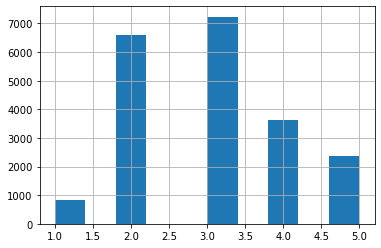

In [12]:
df["income_cat"].hist()

In [13]:
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)  #FOR  STATIFIED SPLITING TO AVOID BIAS 
for train_index,test_index in split.split(df,df["income_cat"]):
    strat_train_set=df.loc[train_index]
    strat_test_set=df.loc[test_index]

In [14]:
strat_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,286600.0,<1H OCEAN,2
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,340600.0,<1H OCEAN,5
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,196900.0,NEAR OCEAN,2
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,46300.0,INLAND,2
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,254500.0,<1H OCEAN,3
...,...,...,...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312,240200.0,INLAND,4
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682,113000.0,INLAND,2
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723,97800.0,INLAND,3
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625,225900.0,<1H OCEAN,3


In [15]:
housing=strat_train_set.copy() #CREATING A COPY OF THE TRAINING DATASET

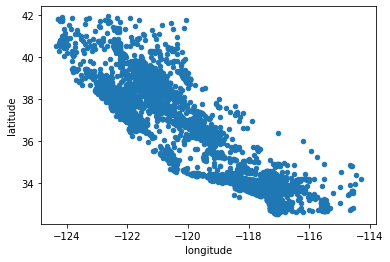

In [16]:
#VISUALING THE GEOGRAPHICAL DATA

housing.plot(kind="scatter",x="longitude",y="latitude")

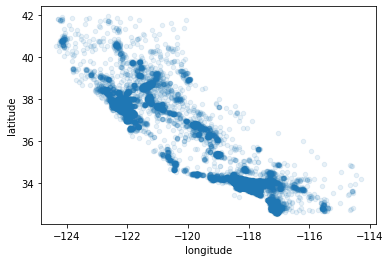

In [17]:
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.1)

In [18]:
#CHECHING FOR RELATIONSHIP BETWEEN THE LABEL AND INDEPENDENT COLUMNS

print(housing.corr()["median_house_value"] )
print("\n THERE IS A STRONG CORRELATIONS BETWEEN THE LABEL(median_house_value) AND median_income,total_rooms")


longitude            -0.047432
latitude             -0.142724
housing_median_age    0.114110
total_rooms           0.135097
total_bedrooms        0.047689
population           -0.026920
households            0.064506
median_income         0.687160
median_house_value    1.000000
Name: median_house_value, dtype: float64

 THERE IS A STRONG CORRELATIONS BETWEEN THE LABEL(median_house_value) AND median_income,total_rooms


In [19]:
#CHECKING COLUMN WITH OUTLIERS

housing.kurt()

longitude             -1.334894
latitude              -1.117609
housing_median_age    -0.796719
total_rooms           31.672983
total_bedrooms        19.543293
population            71.784149
households            19.287495
median_income          4.934028
median_house_value     0.334654
income_cat            -0.613362
dtype: float64

In [20]:
housing.skew()

longitude            -0.293318
latitude              0.461200
housing_median_age    0.059534
total_rooms           4.000398
total_bedrooms        3.268381
population            4.741063
households            3.221306
median_income         1.653513
median_house_value    0.987005
income_cat            0.368406
dtype: float64

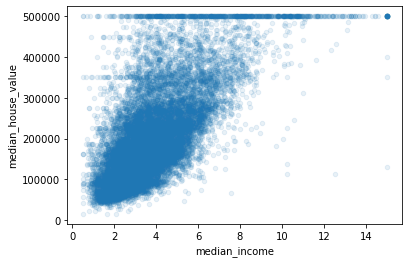

In [21]:
# SCATTER PLOT BETWEEN THE TARGET COLUMN AND median_income COLUMNS

housing.plot(kind="scatter",x="median_income",y="median_house_value",alpha=0.1)
plt.show()

In [22]:
#DOING SOME FEATURE ENGINEERING WITH COMBINATIONS OF TWO COLUMNS

housing["rooms_per_household"]=housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"]=housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [23]:
housing.corr()["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

PREPARING DATA FOR MACHING LEARNING ALGORITHMS

In [24]:
#SEPARATING THE TARGET VARIABLE FROM INDEPENDENT VARIABLE

housing=strat_train_set.drop("median_house_value",axis=1)
housing_label=strat_train_set["median_house_value"].copy()

In [25]:
#SEPARATING THE NUMERICAL COLUMN FROM THE CATEGORICAL ONE
housing_num=housing.drop("ocean_proximity",axis=1)


In [26]:
#IMPUTATION WITH SKLEARN

imputer=(SimpleImputer(missing_values=np.nan,strategy="median")) 
X=imputer.fit_transform(housing_num)
housing_transform=pd.DataFrame(X,columns=housing_num.columns)


In [27]:
#COMFIMING IF ALL ROW HAS NO NULL VALUE AFTER THE IMPUTATION
housing_transform.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   income_cat          16512 non-null  float64
dtypes: float64(9)
memory usage: 1.1 MB


In [28]:
#THE INDEPENDENT CATIGOGICAL COLUMN
housing_cat=housing[["ocean_proximity"]]
housing_cat

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
...,...
6563,INLAND
12053,INLAND
13908,INLAND
11159,<1H OCEAN


In [29]:
'''USING ORDINALENCODER FOR THE TRANSFORMATION OF THE COLUMN WITH CATIGORICAL DATA 
TO NUMERIC, BUT DOESN'T FIT THE DATA AND INSTEAD ,ONEHOTENCODER IS USED FOR MACHINE LEARNING ALGORITHM TO BE EFFECTIVE''' 

from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
ordinal_encoder=OrdinalEncoder()
housing_cat_encorder=ordinal_encoder.fit_transform(housing_cat)

In [30]:
housing_cat_encorder

array([[0.],
       [0.],
       [4.],
       ...,
       [1.],
       [0.],
       [3.]])

In [31]:
np.array(housing_cat["ocean_proximity"].value_counts().index)

array(['<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND'],
      dtype=object)

In [32]:
#USING ONEHOTENCODER FOR THE TRANSFORMATION
cat_encoder=OneHotEncoder()
housing_cat_1hot=cat_encoder.fit_transform(housing_cat)

In [33]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [34]:
#CREATING A PIPELINE FOR THE DATA PREPROCESSING THAT WAS DONE 

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline=Pipeline([
    ("imputer",SimpleImputer(strategy="median")),
    ("std_scaler",StandardScaler())
])
housing_num_tr=num_pipeline.fit_transform(housing_num)


In [35]:
housing_num_tr

array([[-1.15604281,  0.77194962,  0.74333089, ..., -0.42069842,
        -0.61493744, -0.95445595],
       [-1.17602483,  0.6596948 , -1.1653172 , ..., -1.02222705,
         1.33645936,  1.89030518],
       [ 1.18684903, -1.34218285,  0.18664186, ..., -0.0933178 ,
        -0.5320456 , -0.95445595],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.71315642,
        -0.3167053 , -0.00620224],
       [ 0.78221312, -0.85106801,  0.18664186, ..., -0.37545069,
         0.09812139, -0.00620224],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.3777909 ,
        -0.15779865, -0.00620224]])

In [36]:
from sklearn.compose import ColumnTransformer
num_attribs=list(housing_num)
cat_attribs=["ocean_proximity"]
full_pipeline=ColumnTransformer([
    ("num",num_pipeline,num_attribs),
    ("cat",OneHotEncoder(),cat_attribs)
])

housing_prepared=full_pipeline.fit_transform(housing)

In [37]:
housing_prepared

array([[-1.15604281,  0.77194962,  0.74333089, ...,  0.        ,
         0.        ,  0.        ],
       [-1.17602483,  0.6596948 , -1.1653172 , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.18684903, -1.34218285,  0.18664186, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58648943, -0.72478134, -1.56295222, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.78221312, -0.85106801,  0.18664186, ...,  0.        ,
         0.        ,  0.        ],
       [-1.43579109,  0.99645926,  1.85670895, ...,  0.        ,
         1.        ,  0.        ]])

TRAINING THE MODEL

In [49]:
#USING LINEAR REGRESSION

from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

lin_reg=LinearRegression()
lin_reg.fit(housing_prepared,housing_label)

LinearRegression()

In [50]:
#USING SOME OF THE TRAIN DATA FOR VALIDATION

some_data=housing.iloc[:5]
some_labels=housing_label.iloc[:5]
some_prepared_data=full_pipeline.transform(some_data)

prediction=lin_reg.predict(some_prepared_data)


In [51]:
from sklearn.metrics import mean_squared_error
rmse=np.sqrt(mean_squared_error(prediction,some_labels))
print('rmse:',rmse)
print("THE IS AN UNDERFITING OF THE TRAINING SET")

rmse: 45350.076237125555
THE IS AN UNDERFITING OF THE TRAINING SET


In [53]:
#USING DECISIONTREEREGRESSOR

tree_reg=DecisionTreeRegressor()
tree_reg.fit(housing_prepared,housing_label)
housing_prediction=tree_reg.predict(some_prepared_data)
tree_rmse=np.sqrt(mean_squared_error(housing_prediction,some_labels))
print("tree_rmse:", tree_rmse)
print("ZERO AS RMSE VALUE; THE CAN BE AN OVERFITTING OF THE TRAINING DATASET")

tree_rmse: 0.0
ZERO AS RMSE VALUE; THE CAN BE AN OVERFITTING OF THE TRAINING DATASET


In [54]:
#USING CROSS VALIDATION TO CONFIRM IF THE MODEL OVERFIT THE DATASET

from sklearn.model_selection import cross_val_score
def val(model,cv=10):
    score=cross_val_score(model,housing_prepared,housing_label,scoring="neg_mean_squared_error",cv=10)
    tree_rmse_score=np.sqrt(-score)
    print("scores",tree_rmse_score)
    print("mean",tree_rmse_score.mean())
    print("std",tree_rmse_score.std())
print(val(tree_reg))
print("the decisiontree doesn't look perfect as before")

scores [67405.95924458 65080.55204715 73040.5114828  70142.38310904
 68632.91585844 77706.49184066 68152.45319308 70067.13671216
 69110.52013533 68340.64968191]
mean 69767.95733051604
std 3284.479420146664
None
the decisiontree doesn't look perfect as before


In [55]:
#using cross validation on linearregression
val(lin_reg)

scores [67621.36459192 67050.2893707  68159.77945126 74185.17069359
 68112.25073467 71610.00721757 65235.24278175 68160.85292722
 72191.44396288 68163.77349381]
mean 69049.01752253594
std 2581.3240040191636


In [56]:
#USING A MORE ROBUST MODEL (RandomForestRegressor)

rand_reg=RandomForestRegressor()
rand_reg.fit(housing_prepared,housing_label)
housing_prediction=rand_reg.predict(some_prepared_data)
rand_rmse=np.sqrt(mean_squared_error(housing_prediction,some_labels))
print("rand_rmse:", rand_rmse)
print("This looks better than before")

rand_rmse: 19936.195840731503
This looks better than before


In [58]:
val(rand_reg)

scores [47946.88636305 45862.01074421 49403.29123366 49838.21492178
 49317.37348978 53359.73306409 48722.20445306 50035.86210257
 51349.10276975 49123.23324564]
mean 49495.791238758684
std 1874.9622047124833


FINE-TUNING THE RandomForestRegressor

In [65]:
#USING GRIDSEACHCV
from sklearn.model_selection import GridSearchCV
tunning=(np.linspace(20,50,10))
k=tunning.astype(int)
dict_tune={"n_estimators":k}
tune_model=GridSearchCV(rand_reg,dict_tune,scoring="neg_mean_squared_error",cv=5)
tune_model.fit(housing_prepared,housing_label) 

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'n_estimators': array([20, 23, 26, 30, 33, 36, 40, 43, 46, 50])},
             scoring='neg_mean_squared_error')

In [66]:
tune_model.best_params_

{'n_estimators': 50}

In [67]:
#EVALUATING THE MODEL ON THE TEST SET

final_reg=RandomForestRegressor(n_estimators=50)
final_reg.fit(housing_prepared,housing_label)


x_test=strat_test_set.drop("median_house_value",axis=1)
y_test=strat_test_set["median_house_value"].copy() 
x_test_prepared=full_pipeline.transform(x_test)
final_prediction=rand_reg.predict(x_test_prepared)

In [68]:
final_rmse=np.sqrt(mean_squared_error(y_test,final_prediction))
print("final_rmse:", final_rmse)


final_rmse: 47433.62546502316
